In [1]:
from fbprophet import Prophet
import pandas as pd

In [24]:
!wget -O hourly.csv https://raw.githubusercontent.com/facebook/prophet/master/examples/example_yosemite_temps.csv

df_hourly = pd.read_csv('hourly.csv')

--2020-08-26 16:17:44--  https://raw.githubusercontent.com/facebook/prophet/master/examples/example_yosemite_temps.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462069 (451K) [text/plain]
Saving to: ‘hourly.csv’

hourly.csv          100%[===================>] 451.24K  1.40MB/s    in 0.3s    

2020-08-26 16:17:45 (1.40 MB/s) - ‘hourly.csv’ saved [462069/462069]



In [25]:
df_hourly.head()

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8
3,2017-05-01 00:15:00,26.5
4,2017-05-01 00:20:00,25.6


In [27]:
hours = []
for item in df_hourly.ds.values:
    hours.append(item[11:])


test = pd.DataFrame(data={'ds':hours})

,ds
0,00:00:00
1,00:05:00
2,00:10:00
3,00:15:00
4,00:20:00


In [34]:
df_hourly.ds = test
df_hourly.value_counts()

ds        y   
13:20:00  7.1     5
07:50:00  12.6    4
03:50:00  10.1    4
13:45:00  11.1    4
06:05:00  7.0     4
                 ..
15:55:00  25.7    1
          25.1    1
          25.0    1
          24.4    1
00:00:00  3.2     1
Length: 16305, dtype: int64

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


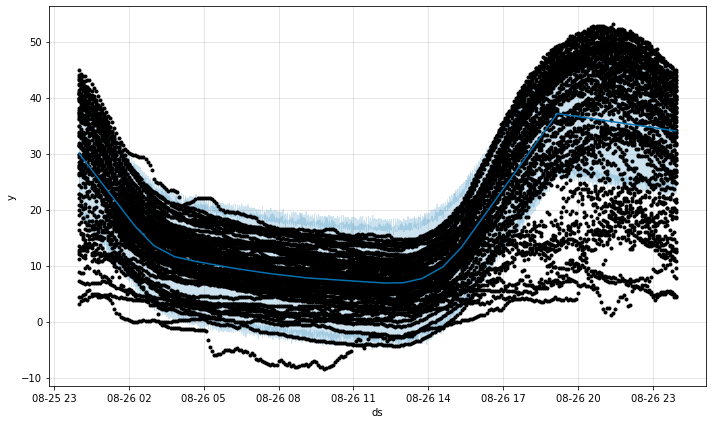

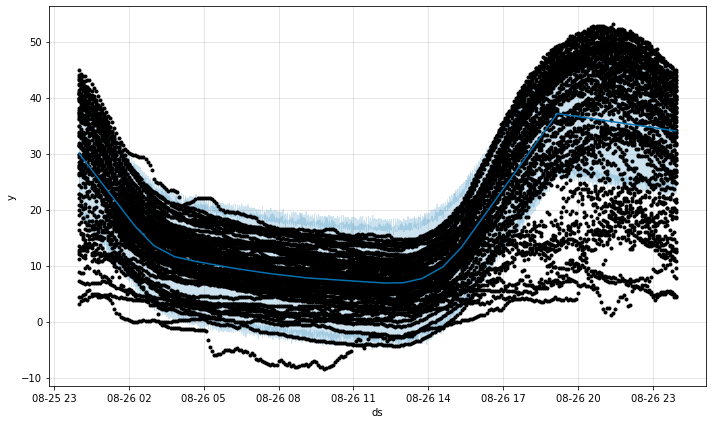

In [29]:
m = Prophet()
m.fit(df_hourly)
forecast =m.predict(df_hourly)
m.plot(forecast)

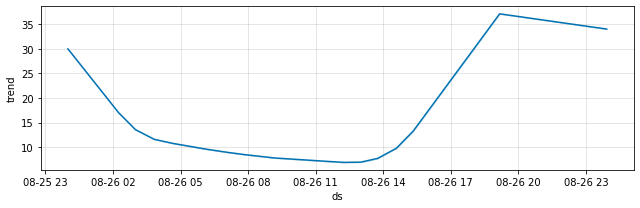

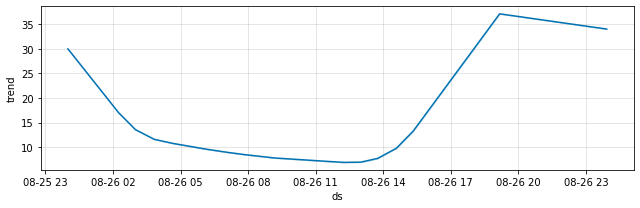

In [30]:
m.plot_components(forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


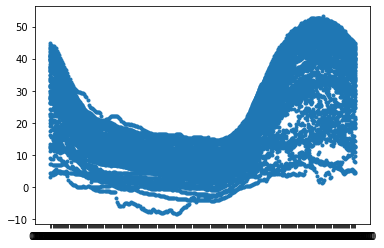

In [36]:
import matplotlib.pyplot as plt

plt.plot(df_hourly.ds,df_hourly.y,'.')
plt.show()

(array([ 183., 1513., 4746., 4431., 2002., 1295., 1291., 1167., 1321.,
         760.]),
 array([-8.4 , -2.24,  3.92, 10.08, 16.24, 22.4 , 28.56, 34.72, 40.88,
        47.04, 53.2 ]),
 <BarContainer object of 10 artists>)

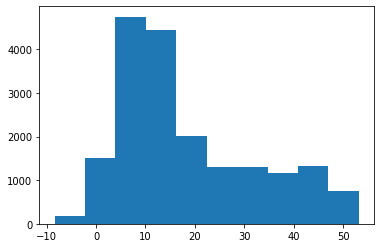

In [65]:
from math import log
import numpy as np
plt.hist((df_hourly.y))